<a href="https://colab.research.google.com/github/gelechi/Gloze/blob/main/Copy_of_Predict_Greenweez_Churners_Challenge_2_ipynb_140525_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 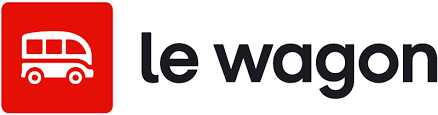

# Predict Greenweez Churners


In this challenge were are going to look at the Greenweez client database!

We want to find out who amongst our existing database of clients will reconvert 🔁 (ie. make a second purchase) within 3 months.

**Our data**

➡️ We have access to the sales from 2019 to 2021.

➡️ Let's take a look


## Data exploration


a) Execute the cell below to load our client data into a dataframe variable called `df`.

Loading the Data

In [ ]:
from google.colab import auth
import pandas as pd

# Will collect your credentials
auth.authenticate_user()

# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.course33.gwz_churn`"
project = "data-analytics-bootcamp-363212"

df = pd.read_gbq(query=query, project_id=project)

<ipython-input-1-794817e1e9d0>:11: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query=query, project_id=project)


b) Let's take a look at our data.

1. As usual, it's useful to first look at the first few rows.
2. What's the shape of our data?
3. Are there any null values?  
4. Given that we are trying to predict 'reconversions', what is our target?

Inspect Data

In [ ]:
# First few rows

print(df.head())

    date_date  orders_id  customers_id  nb_past_orders  avg_basket  \
0  2021-03-08     797405        207754               3   65.456667   
1  2021-06-23     914331        229390               2   84.650000   
2  2021-04-27     857750          4921               3   48.343333   
3  2021-02-28     786589         10797               8   74.970000   
4  2021-06-08     901782        116681               3   62.113333   

   total_purchase_cost  avg_quantity  total_quantity  \
0               196.37     29.333333              88   
1               169.30     40.000000              80   
2               145.03     20.000000              60   
3               599.76     26.500000             212   
4               186.34     16.666667              50   

   nb_days_since_last_order  avg_nb_unique_products  total_nb_codes  \
0                         0               23.000000               1   
1                         0               34.500000               1   
2                         0  

In [ ]:
# shape of the dataset

print("shape of the dataset:", df.shape)

shape of the dataset: (381398, 12)


In [ ]:
# check for null values

print("Null values:\n", df.isnull().sum())



Null values:
 date_date                   0
orders_id                   0
customers_id                0
nb_past_orders              0
avg_basket                  0
total_purchase_cost         0
avg_quantity                0
total_quantity              0
nb_days_since_last_order    0
avg_nb_unique_products      0
total_nb_codes              0
re_purchase                 0
dtype: int64


<details>
    <summary><i>Answer:</i></summary>
     
Your DataFrame should be of shape 381398 * 12.
    
The target is the `re_purchase` column, and the other columns will be your features.
    
There are no null values in data.
</details>        

In [ ]:
# Target column

print("Target column is 're_purchase'")

Target column is 're_purchase'


Summary:



*   Shape: 381398*12
*   No Null values
*   Target: re_purchase





c) What do you think of column `orders_id` for our problem? Is it useful for our analysis?

<details>
    <summary><i>Answer:</i></summary>

Orders_id is not useful in this case! It is the unique identifier for the Greenweez database, but doesn't provide any info that we use to predict reconversions.
</details>   

d) Now, delete `orders_id` and `date_date` columns.

In [ ]:
# Deleting orders_id and date_date

df.drop(columns=['orders_id', 'date_date'], inplace=True)

e) Have a look at whether our columns values are on different scales. To do this, use the DataFrame `.describe()` method to compare them.

What kind of preprocessing we will have to use ?

In [ ]:
# checking for Feature scale and Normalisation

print(df.describe())

        customers_id  nb_past_orders     avg_basket  total_purchase_cost  \
count       381398.0        381398.0  381398.000000        381398.000000   
mean   161066.560242        2.058692      51.570302           124.525402   
std     95853.282456        2.030991      41.144718           291.427518   
min              2.0             1.0       0.000000             0.000000   
25%          69762.0             1.0      26.290000            30.310000   
50%         174880.0             1.0      43.760000            65.550000   
75%         244394.0             2.0      66.840000           150.350000   
max         314334.0            61.0    4726.440000         22738.110000   

        avg_quantity  total_quantity  nb_days_since_last_order  \
count  381398.000000        381398.0                  381398.0   
mean       13.558555       33.825301                       0.0   
std        13.202761       71.181359                       0.0   
min         1.000000             1.0               

<details>
    <summary><i>Answer:</i></summary>

The features are indeed on different scales. For example, total_nb_codes in comparison with avg_basket.

As a result, we will need to use a normalization technique.
</details>

f) Set column `customers_id` as index to keep customer_id information.

In [ ]:
# Setting customers_id as index

df.set_index('customers_id', inplace=True)

Note that for the sake of the exercise, we've **already preprocessed some of the data for you** 🔧.

This means you'll be working on a (relatively) clean database, with your targets and features already formed. In a real-world situation, it's likely that you'll be spending a lot of time forming your target and features from simpler, less-specific data, either using python or SQL to manipulate the database.

## Modeling

Now that we've seen what our data looks like, we need to define our target and features.

a) Split dataset into a train and a test set (this should give you an `X_train`, `X_test`, `y_train` and `y_test`).

We will keep a test_size of 20%.

In [12]:
from sklearn.model_selection import train_test_split

# every columns in X variable except re_purchase which is our target

X = df.drop(columns='re_purchase')
y = df['re_purchase']


# split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# store customers_ids for after
test_customers_ids = X_test.index

b) Execute the cell below to apply normalization on our data. We are going to use a StandardScaler for this transformation.

*Make sure you understand what this code does.*

Why do we use `.fit_transform()` on the train set and `.transform()` on the test set?

fit_transform vs transform:

.fit_transfrom() calculates the mean and STD from traing data
-transform() uses the same parameters to scale test data (avoids data leakage).

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# apply same transformation on X_test
X_test = scaler.transform(X_test)

c) What are the types of X_train and X_test?

In [14]:
# Checking Data_Types

print("Type of X_train:", type(X_train))
print("Type of X_test:", type(X_test))

Type of X_train: <class 'numpy.ndarray'>
Type of X_test: <class 'numpy.ndarray'>


X_train and X_test are of type numpy.ndarray.

d) Before building our first model we need a baseline to compare our futur models!

For this example, calculate the accuracy score for a stupid model returning always 1.

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

baseline_y_pred = pd.Series(np.ones([76280]))

baseline_accuracy = accuracy_score(y_test, baseline_y_pred)

print(f"Baseline accuracy is {round(baseline_accuracy,2)}")

Baseline accuracy is 0.48


Now that we have a baseline, even if it's poor, we will try to surpass it!

e) Let's build our first model!

We will use a simple logistic regression model. Execute cell below to train your model on the train data and store the test data predictions in a variable `y_pred`.

Make sure you understand what this code does.

In [16]:
from sklearn.linear_model import LogisticRegression

# train model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# store predictions
y_pred = clf.predict(X_test)

f) Calculate the accuracy you get on test data.

How do you interpret this value?

In [17]:
# Evaluate Accuracy

model_accuracy = accuracy_score(y_test, y_pred)
print(f"logistic Regression Accuracy: {round(model_accuracy, 2)}")

logistic Regression Accuracy: 0.73


<details>
    <summary><i>Answer:</i></summary>

Logistic regression score corresponds to accuracy.
We see here 73% accuracy on both train and test data. It means that 73% of our predictions are good.

There is no overfitting as there is no difference in scores between train and test
</details>

~73% accuracy. No overfitting since test and train score are similar.

g) Accuracy is one way to judge model performance, but plotting a confusion matrix on the test data can be more informative. This is because you can calculate additional metrics from this matrix!

Execute cell below to plot confusion matrix.

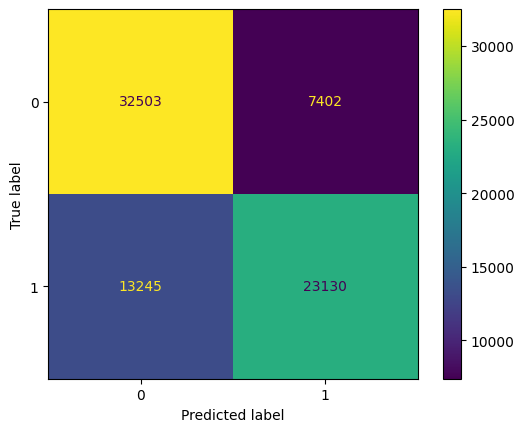

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

h) From your confusion matrix and the below picture, calculate:
- precision
- recall
- accuracy

Remember to make sure you are using the values associated with the correct labels when doing so!

![confusion matrix](https://wagon-public-assets.s3.eu-west-3.amazonaws.com/pchl73lhb84nyh6ic4yzw98bl2me)

<details>
    <summary><i>Answer:</i></summary>

- precision: 23142 / (23142 + 7269) = 23142 / 30411 = 75.94%
- recall: 23142 / (13150 + 23142) = 23142 / 36292 = 63.77%
- accuracy: (32719 + 23142) / 76280 = 55861 / 76280 = 73.23%
</details>

i) What is the percent of churners your model correctly detected? Is it good?

In [20]:
# % of Churner_Detected

churner_detected_pct = 32719 / (32719 + 7269)
print(f"Correctly identified churners: {churner_detected_pct * 100:.2f}%")


Correctly identified churners: 81.82%


<details>
    <summary><i>Answer:</i></summary>

number_churners_correctly_detected / number_of_churners = 32719 / (32719 + 7269) = 32504 / 39988 = 81.82%

Not bad at all, we have now a model to identify 81.82% of churners :)
</details>

j) What does the code below do? Why would this be useful from a business perspective?

In [19]:
proba = pd.DataFrame(clf.predict_proba(X_test), columns=["Churner", "Not churner"], index=test_customers_ids)
proba

,Churner,Not churner
customers_id,,
224445,0.793215,0.206785
246576,0.316082,0.683918
183179,0.722314,0.277686
58745,0.764374,0.235626
55281,0.270112,0.729888
...,...,...
117015,0.766990,0.233010
225767,0.097972,0.902028
88740,0.692688,0.307312


from matplotlib import pyplot as plt
proba['Churner'].plot(kind='hist', bins=20, title='Churner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
proba['Not churner'].plot(kind='hist', bins=20, title='Not churner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
proba.plot(kind='scatter', x='Churner', y='Not churner', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
proba['Churner'].plot(kind='line', figsize=(8, 4), title='Churner')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
proba['Not churner'].plot(kind='line', figsize=(8, 4), title='Not churner')
plt.gca().spines[['top', 'right']].set_visible(False)

<details>
    <summary><i>Answer:</i></summary>

We can get probability to repurchase or not (column not churner).
</details>

By knowing the probabilities, the CRM team can prioritise interventions based on how likely a customer is to re_purchase- they might decide to intervene more agrresively with customers in between certain thresholds.

k) Filter this dataframe on customers who have between 20% and 50% probability to re purchase.

Customers with a probability of less than 20% to repurchase are considered lost.

In [21]:
# Filter customer by Purchase_Probability

target_customers = proba[(proba["Not churner"] >=0.2) & (proba["Not churner"] <= 0.5)]
target_customers.head()

,Churner,Not churner
customers_id,,
224445,0.793215,0.206785
183179,0.722314,0.277686
58745,0.764374,0.235626
302406,0.730515,0.269485
253979,0.762277,0.237723


from matplotlib import pyplot as plt
_df_0['Churner'].plot(kind='hist', bins=20, title='Churner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Not churner'].plot(kind='hist', bins=20, title='Not churner')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Churner', y='Not churner', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Churner'].plot(kind='line', figsize=(8, 4), title='Churner')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Not churner'].plot(kind='line', figsize=(8, 4), title='Not churner')
plt.gca().spines[['top', 'right']].set_visible(False)

l) Well done! You now have a model that predicts churners.

Using this model, suggest a process that can be implemented at GreenWeez to help the company reduce the churn rate.


<details>
    <summary><i>Answer:</i></summary>

On a regular basis, predict possible churners and send this info back to the CRM via ELT.

The CRM team will then target those users who are predicted as likely to churn by sending them coupon codes, discounts, ...
things that will hopefully retain them!
</details>

Business Process Recommendation:

Process to Reduce Churn Rate;

With the model built and evaluated, here is an actionable process for Greenweez:

**Regular Scoring:** On a scheduled basis (e.g., monthly or quarterly), use the model to score the existing customer base. Compute for each customer their probability of repurchase.

**Segmenting the Customer Database:** Using the probability scores, segment your customers into groups. For example:

Customers with very low probability (below 20%) can be considered lost and might receive less resource-intensive interventions.

Customers with a 20%-50% probability (as filtered above) are at the edge. These are ideal candidates for retention interventions because a small push (discount, personalized offer) might convert them.

Customers with high probability might be given loyalty rewards to further cement their reconversion.

**Targeted CRM Interventions:** Feed the segment information back to the CRM system via an ELT (Extract, Load, Transform) pipeline. The CRM team can then target the at-risk segment with personalized marketing campaigns — for example, sending coupon codes, special discounts, or even tailored content that encourages repeat purchases.

**Monitoring and Feedback:** Continuously monitor the effectiveness of these interventions by tracking metrics such as re-purchase rate, response rate to marketing offers, and overall customer lifetime value. Use this feedback to refine both the model and the marketing strategy over time.

Conclusion: This process allows Greenweez not only to identify customers who are likely to churn but also to prioritize retention efforts, ultimately reducing the churn rate and increasing long-term revenue.

